In [8]:
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical

In [52]:
def voted_result(filepath, n_models, n_classes):
    
    y_hat_ensemble = None
    
    for i in range(n_models):
        file = filepath.replace('#', str(i))
        y_hat = np.fromfile(file, dtype='float32').reshape(-1, n_classes)
        print(np.argmax(y_hat, axis=1))
        y_hat = to_categorical(np.argmax(y_hat, axis=1), num_classes=n_classes)
            
        if y_hat_ensemble is None:
            y_hat_ensemble = np.zeros_like(y_hat)
        y_hat_ensemble = y_hat_ensemble + y_hat
    
    y_hat_ensemble = y_hat_ensemble + np.random.normal(size=y_hat_ensemble.shape) / 1e4
    
    return np.argmax(y_hat_ensemble, axis=1)

In [53]:
y_hat_val = voted_result('./results/Model_1_#_test_cls', 10, 3)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[1 1 1 ... 1 0 1]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[1 1 1 ... 1 0 1]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [55]:
from matplotlib import pyplot as plt

In [59]:
np.count_nonzero(y_hat_val)

3

In [40]:
y_val = np.argmax(y_val, axis=1)

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(y_hat_val, y_val)

0.7733503717472119

In [62]:
y_val.astype('float32').tofile('test')

In [74]:
y = np.fromfile('./results/Model_1_0_test_reg', dtype='float32')

(array([3.1147e+04, 1.8805e+04, 2.8000e+01, 1.4000e+01, 5.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  0.64669526,  60.799572  , 120.95245   , 181.10533   ,
        241.25821   , 301.41107   , 361.56396   , 421.71683   ,
        481.86972   , 542.0226    , 602.1755    ], dtype=float32),
 <a list of 10 Patch objects>)

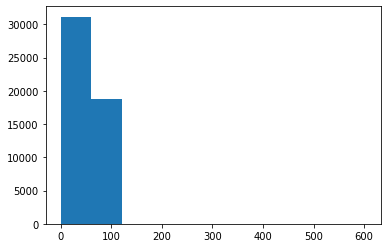

In [75]:
plt.hist(y)